Complement Color Transformation. Converts each intensity value into 255-intencity value.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)

In [4]:
idx = QuantumRegister(2, 'idx')
intensity = QuantumRegister(8,'intensity')
cr = ClassicalRegister(10, 'cr')
qc_image = QuantumCircuit(intensity, idx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.x(idx)
qc_image.h(8)
qc_image.h(9)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(2)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            qc_image.ccx(num_qubits-1, num_qubits-2, idx)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
qc_image.measure(range(10),range(10))

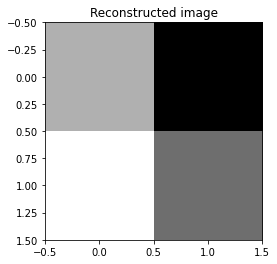

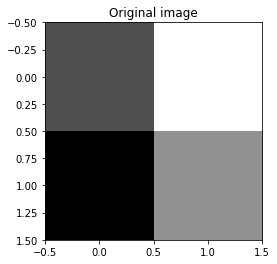

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:2], 2), int(item[2:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()